In [18]:
import warnings
warnings.filterwarnings('ignore')

## **1. Get the Data**
---

In [19]:
import kagglehub
import os
import shutil

# Download Kaggle dataset
path = kagglehub.dataset_download('dylanjcastillo/7k-books-with-metadata')

# Move dataset to data directory
os.makedirs('./data', exist_ok=True)

for file in os.listdir(path):
    source      = os.path.join(path, file)
    destination = os.path.join('./data', file)
    shutil.move(source, destination)

In [20]:
import pandas as pd

df = pd.read_csv('./data/books.csv')
df.head(5)

isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2  Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   

   average_rating  num_pages  ratings_count  
0            3.85      247.0          361.0  
1            3.83      241.0         5164.0  
2            3.97      479.0          172.0  
3            3.93      512.0        29532.0  
4            4.15      170.0        33684.0

## **2. Explore the Data**
---

### 2.1. Overview

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [22]:
df.describe(include='all').T

count unique  \
isbn13          6810.0    NaN   
isbn10            6810   6810   
title             6810   6398   
subtitle          2381   2009   
authors           6738   3780   
categories        6711    567   
thumbnail         6481   6481   
description       6548   6474   
published_year  6804.0    NaN   
average_rating  6767.0    NaN   
num_pages       6767.0    NaN   
ratings_count   6767.0    NaN   

                                                              top  freq  \
isbn13                                                        NaN   NaN   
isbn10                                                 9042003405     1   
title                                       The Lord of the Rings    11   
subtitle                                                  A Novel   226   
authors                                           Agatha Christie    37   
categories                                                Fiction  2588   
thumbnail       http://books.google.com/books/content?id=2lVyR...     1   
description                                    No Marketing Blurb     6   
published_year                                                NaN   NaN   
average_rating                                                NaN   NaN   
num_pages                                                     NaN   NaN   
ratings_count                                                 NaN   NaN   

                                mean               std              min  \
isbn13          9780676621541.416016  606891056.586608  9780002005883.0   
isbn10                           NaN               NaN              NaN   
title                            NaN               NaN              NaN   
subtitle                         NaN               NaN              NaN   
authors                          NaN               NaN              NaN   
categories                       NaN               NaN              NaN   
thumbnail                        NaN               NaN              NaN   
description                      NaN               NaN              NaN   
published_year           1998.630364         10.484257           1853.0   
average_rating              3.933284          0.331352              0.0   
num_pages                 348.181026        242.376783              0.0   
ratings_count           21069.099897     137620.678647              0.0   

                            25%              50%              75%  \
isbn13          9780330341506.0  9780553108095.5  9780809982553.5   
isbn10                      NaN              NaN              NaN   
title                       NaN              NaN              NaN   
subtitle                    NaN              NaN              NaN   
authors                     NaN              NaN              NaN   
categories                  NaN              NaN              NaN   
thumbnail                   NaN              NaN              NaN   
description                 NaN              NaN              NaN   
published_year           1996.0           2002.0           2005.0   
average_rating             3.77             3.96             4.13   
num_pages                 208.0            304.0            420.0   
ratings_count             159.0           1018.0           5992.5   

                            max  
isbn13          9789042003408.0  
isbn10                      NaN  
title                       NaN  
subtitle                    NaN  
authors                     NaN  
categories                  NaN  
thumbnail                   NaN  
description                 NaN  
published_year           2019.0  
average_rating              5.0  
num_pages                3342.0  
ratings_count         5629932.0

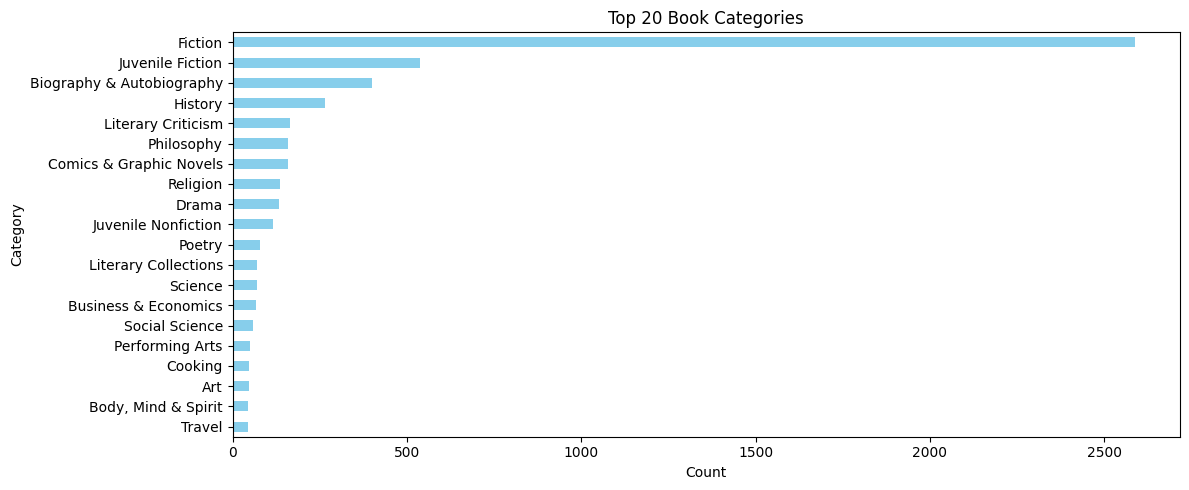

In [23]:
import matplotlib.pyplot as plt

category_counts = df['categories'].value_counts().head(20).sort_values(ascending=True)

plt.figure(figsize=(12, 5))
category_counts.plot(kind='barh', color='skyblue')
plt.title('Top 20 Book Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Objective: Utilize the most important features: `isbn13`, `categories`, `description`.

Observations:

- `isbn13` is completely unique and can be used as a stable identifier for books → `isbn10` is redundant and can be safely removed.

- `subtitle` has ~65% missing values → It can either be dropped or concatenated with `title` to form a richer `full_title` feature for textual modeling.

- `categories` contains 567 unique values, but many of them are sparse (appearing only once) →  Requires cleaning and filtering first - keeping only frequent categories or clustering similar ones.

- `description` is the most critical feature for semantic recommendation. With only ~3.85% missing values, coverage is good → However, it's important to analyze whether the missing entries are biased toward specific categories or metadata (e.g., low popularity books).

- Other features such as `authors`, `published_year`, `average_rating`, `ratings_count`, and `num_pages` can be considered later as auxiliary features, especially for ranking or filtering. `thumbnail` feature will be used for visualizing book cover if needed.

### 2.2. Check for NaN

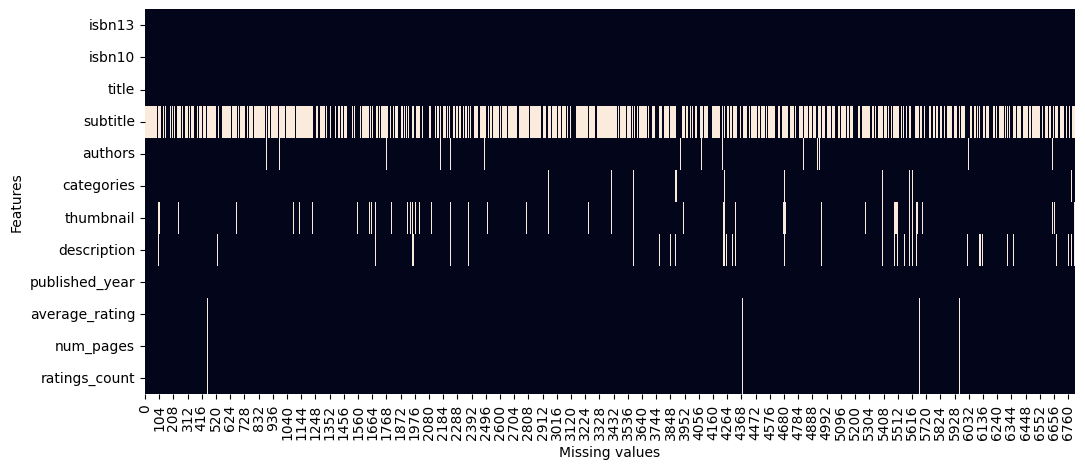

In [24]:
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.heatmap(df.T.isna(), cbar=False)
plt.xlabel("Missing values")
plt.ylabel("Features")
plt.show()

Observations:

- `average_rating`, `num_pages` and `ratings_count` exhibit a pattern where if one is missing, the others tend to be missing as well → Check whether this has any effect on the most important feature, `description`.

### 2.3. Check for books where `description` is missing

In [25]:
import numpy as np

df['missing_desc'] = np.where(df['description'].isna(), 1, 0)
df['age_of_book']  = 2025 - df['published_year']

cols_to_consider     = ['age_of_book', 'num_pages', 'average_rating', 'ratings_count', 'description']
new_cols_to_consider = ['age_of_book', 'num_pages', 'average_rating', 'ratings_count', 'missing_desc']

In [26]:
col_nan_counts = (
    df[cols_to_consider].isna().sum()
    .reset_index()
    .rename(columns={'index': 'feature', 0: 'cnt of NaN'})
)
row_nan_total = df[cols_to_consider].isna().any(axis=1).sum()

stats = pd.concat([
    col_nan_counts,
    pd.DataFrame([{
        'feature': 'Rows with any NaN in considered features',
        'cnt of NaN': row_nan_total,
    }])
], ignore_index=True)

stats['pct of NaN'] = round(stats['cnt of NaN'] / len(df) * 100, 2)
stats

feature  cnt of NaN  pct of NaN
0                               age_of_book           6        0.09
1                                 num_pages          43        0.63
2                            average_rating          43        0.63
3                             ratings_count          43        0.63
4                               description         262        3.85
5  Rows with any NaN in considered features         303        4.45

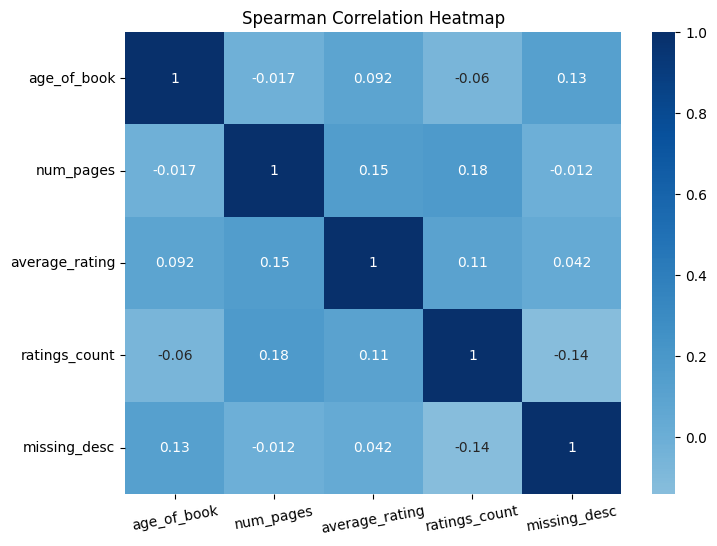

In [27]:
# The correlation between considered columns
# Spearman is less sensitive to outliers and suitable for non continuous data than Peason
correlation_matrix = df[new_cols_to_consider].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.yticks(rotation=0)
plt.xticks(rotation=10)
plt.title('Spearman Correlation Heatmap')
plt.show()

Although the heatmap shows low correlation between `missing_desc` and other features, and the percentage of missing values is low in these columns (< 5%), one might conclude that it is acceptable to drop all rows with NaN in any of the following columns: `published_year`, `average_rating`, `ratings_count`, `num_pages`, and `description`.

However:

- Some books that have a `description` but no `ratings_count` may be newly published and still valuable for recommendation, albeit possibly in a lower priority tier.
- Some books that lack a `description` but have other metadata (e.g., `ratings_count`, `num_pages`, etc.) could still be used by generating a synthetic `description` using LLMs from `title` and `category`.

Therefore:

- Only remove rows that have missing values in `published_year`, `average_rating`, `num_pages`, or `ratings_count`, as these are harder to impute or approximate meaningfully.
- For rows missing `description`, experiment with two approaches:
  1. Remove them entirely along with the above features -> Main approach.
  2. Generate synthetic descriptions using metadata and include them in the recommender.

In [28]:
# Approach 1
books = df[df[cols_to_consider].notna().all(axis=1)]
len(books)

6507

### 2.4. Remove short value (meaningless description) in `description`

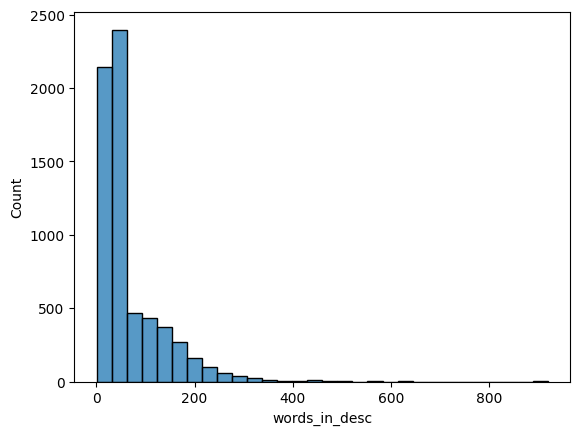

In [29]:
books['words_in_desc'] = books['description'].str.split().str.len()

sns.histplot(books['words_in_desc'], bins=30)
plt.show()

In [30]:
ranges = [(1, 4), (5, 14), (15, 24), (25, 34)]

for lower, upper in ranges:
    print(f"\nRange {lower} - {upper}:\n")
    print(books[books['words_in_desc'].between(lower, upper)]['description'].head(5))


Range 1 - 4:

6                                 Donation.
11                           Fantasy-roman.
748    Includes bibliographical references.
770                   Bound For Oregon (PB)
775                      No Marketing Blurb
Name: description, dtype: object

Range 5 - 14:

2     Volume Two of Stephen Donaldson's acclaimed se...
38    Koko is Peter Straub's foray into the psycholo...
70    A matter of life and death - and the Throne of...
77                       Nonsense rhyming story. 4 yrs+
84    A study guide for the novel There's a Boy in t...
Name: description, dtype: object

Range 15 - 24:

10    One of Sidney Sheldon's most popular and bests...
32    Tells the story of three generations of Chines...
36    A magical and fantastic collection of early st...
57    A young drifter finds more than he bargained f...
68    A new 'The Doors of Perception' for the 21st c...
Name: description, dtype: object

Range 25 - 34:

9     Kate Blackwell is an enigma and one of the mos...


In [31]:
books_final = books[books['words_in_desc'] >= 25]

## **3. Final Cleaning**
---

In [32]:
books_final['full_title'] = np.where(
    books_final['subtitle'].isna(),
    books_final['title'],
    books_final[['title', 'subtitle']].astype(str).agg(': '.join, axis=1)
)

books_final['full_desc'] = books_final[['isbn13', 'description']].astype(str).agg(' '.join, axis=1)
books_final.head(5)

isbn13      isbn10                title subtitle  \
0  9780002005883  0002005883               Gilead      NaN   
1  9780002261982  0002261987         Spider's Web  A Novel   
3  9780006178736  0006178731       Rage of angels      NaN   
4  9780006280897  0006280897       The Four Loves      NaN   
5  9780006280934  0006280935  The Problem of Pain      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   
5              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   
5  http://books.google.com/books/content?id=Kk-uV...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   
5  "In The Problem of Pain, C.S. Lewis, one of th...          2002.0   

   average_rating  num_pages  ratings_count  missing_desc  age_of_book  \
0            3.85      247.0          361.0             0         21.0   
1            3.83      241.0         5164.0             0         25.0   
3            3.93      512.0        29532.0             0         32.0   
4            4.15      170.0        33684.0             0         23.0   
5            4.09      176.0        37569.0             0         23.0   

   words_in_desc             full_title  \
0            199                 Gilead   
1            205  Spider's Web: A Novel   
3             57         Rage of angels   
4             45         The Four Loves   
5             75    The Problem of Pain   

                                           full_desc  
0  9780002005883 A NOVEL THAT READERS and critics...  
1  9780002261982 A new 'Christie for Christmas' -...  
3  9780006178736 A memorable, mesmerizing heroine...  
4  9780006280897 Lewis' work on the nature of lov...  
5  9780006280934 "In The Problem of Pain, C.S. Le...

In [33]:
books_final = books_final.drop(['isbn10', 'title', 'subtitle', 'missing_desc', 'age_of_book', 'words_in_desc'], axis=1)

books_final = books_final[['isbn13', 'full_title', 'authors', 'categories', 
                           'description', 'full_desc',
                           'published_year', 'num_pages', 'average_rating', 'ratings_count', 
                           'thumbnail']]

books_final.to_csv('./data/books_cleaned.csv', index=False)

books_final.head()

isbn13             full_title                          authors  \
0  9780002005883                 Gilead               Marilynne Robinson   
1  9780002261982  Spider's Web: A Novel  Charles Osborne;Agatha Christie   
3  9780006178736         Rage of angels                   Sidney Sheldon   
4  9780006280897         The Four Loves              Clive Staples Lewis   
5  9780006280934    The Problem of Pain              Clive Staples Lewis   

                      categories  \
0                        Fiction   
1  Detective and mystery stories   
3                        Fiction   
4                 Christian life   
5                 Christian life   

                                         description  \
0  A NOVEL THAT READERS and critics have been eag...   
1  A new 'Christie for Christmas' -- a full-lengt...   
3  A memorable, mesmerizing heroine Jennifer -- b...   
4  Lewis' work on the nature of love divides love...   
5  "In The Problem of Pain, C.S. Lewis, one of th...   

                                           full_desc  published_year  \
0  9780002005883 A NOVEL THAT READERS and critics...          2004.0   
1  9780002261982 A new 'Christie for Christmas' -...          2000.0   
3  9780006178736 A memorable, mesmerizing heroine...          1993.0   
4  9780006280897 Lewis' work on the nature of lov...          2002.0   
5  9780006280934 "In The Problem of Pain, C.S. Le...          2002.0   

   num_pages  average_rating  ratings_count  \
0      247.0            3.85          361.0   
1      241.0            3.83         5164.0   
3      512.0            3.93        29532.0   
4      170.0            4.15        33684.0   
5      176.0            4.09        37569.0   

                                           thumbnail  
0  http://books.google.com/books/content?id=KQZCP...  
1  http://books.google.com/books/content?id=gA5GP...  
3  http://books.google.com/books/content?id=FKo2T...  
4  http://books.google.com/books/content?id=XhQ5X...  
5  http://books.google.com/books/content?id=Kk-uV...

In [34]:
books_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 0 to 6808
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          5197 non-null   int64  
 1   full_title      5197 non-null   object 
 2   authors         5165 non-null   object 
 3   categories      5167 non-null   object 
 4   description     5197 non-null   object 
 5   full_desc       5197 non-null   object 
 6   published_year  5197 non-null   float64
 7   num_pages       5197 non-null   float64
 8   average_rating  5197 non-null   float64
 9   ratings_count   5197 non-null   float64
 10  thumbnail       5031 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 487.2+ KB
